# Модель Перцептрона для распознавания латинских букв

In [7]:
from tensorflow.keras import utils
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import string
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import os
import cv2
%matplotlib inline

In [8]:
x_train = []
# Названия классов
classes = list(string.ascii_uppercase)

In [9]:
def transformation(path):
    """Метод возвращающий отредактированное изображение в виде вектора."""
    img = image.load_img(path, target_size=(32, 32), grayscale=True)
    # Преобразуем картинку в массив
    x = image.img_to_array(img)
    # Меняем форму массива на плоский вектор
    x = x.reshape(1024)
    # Инвентируем изображение
    x = 255 - x
    # Нормализуем изображение
    x /= 255
    return (x)

In [10]:
"""Загрузка и препроцессинг данных"""

my_folder = os.listdir('letters_data/')
X_train =[]
y_train = []
for folder in my_folder:
    path = 'letters_data/{}'.format(folder)
    files = os.listdir(path)
    for file in files:
        path = 'letters_data/{0}/{1}'.format(folder, file)
        img = image.load_img(path, target_size=(32, 32), color_mode = "grayscale")
        x = image.img_to_array(img)
        x = x.reshape(1024)
        x = 255 - x
        x /= 255
        X_train.append(x)
        y_train.append(int(file[:-4]))

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = y_train.reshape(270, 1)
y_train = utils.to_categorical(y_train, 26)

In [17]:
X_test = []
for i in range(9):
    """Добавляем в массив (тестовые данные) 9 изображений"""
    X_test.append(transformation('test_letters/{}.png'.format(i)))
X_test = np.array(X_test)
y_test = np.array([0, 1, 2, 4, 6, 9, 11, 13, 19, 20])

In [22]:
class Perceptron:
    """Класс реализующий Перцептрон"""

    def __init__(self, learning_rate=0.01, epochs=100):
        """
        Конструктор

        :param learning_rate: Скорость обучения
        :param epochs:        Количество эпох
        """
        self.lr = learning_rate
        self.epochs = epochs
        self.amount_input_neurons = 1024
        self.amount_hidden_neurons = 512
        self.amount_output_neurons = 26

        self.weights_input_to_hidden = np.random.normal(0.0, pow(self.amount_input_neurons, -0.5),
                                                        (self.amount_hidden_neurons, self.amount_input_neurons))
        self.weights_hidden_to_output = np.random.normal(0.0, pow(self.amount_hidden_neurons, -0.5),
                                                         (self.amount_output_neurons, self.amount_hidden_neurons))

    def fit(self, X, y):
        """
        Метод, реализующий обучение

        :param X: Тренировочные данные
        :param y: Ответы на тренировочные данные
        """

        for j in range(self.epochs):

            for idx, x_i in enumerate(X):
                hidden_inputs = np.dot(self.weights_input_to_hidden, x_i)
                hidden_outputs = self.activation_func(hidden_inputs)

                final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
                final_outputs = self.activation_func(final_inputs)

                output_errors = y[idx] - final_outputs
                hidden_errors = np.dot(self.weights_hidden_to_output.T, output_errors)

                a = (output_errors * final_outputs * (1 - final_outputs)).reshape(26, 1)
                b = (hidden_errors * hidden_outputs * (1 - hidden_outputs)).reshape(512, 1)

                self.weights_hidden_to_output += self.lr * np.dot(a, np.transpose(hidden_outputs).reshape(1, 512))
                self.weights_input_to_hidden += self.lr * np.dot(b, np.transpose(x_i).reshape(1, 1024))
            print(f'Epoch number: {j + 1}')

    def activation_func(self, x):
        """
        Сигмоида
        :param x: Значение
        """
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        """
        Метод, реализующий прогноз

        :param X: Вектор Значений
        :return: Предсказанные Значения
        """
        X = np.array(X, ndmin=2).T

        hidden_inputs = np.dot(self.weights_input_to_hidden, X)
        hidden_outputs = self.activation_func(hidden_inputs)

        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
        y_predicted = self.activation_func(final_inputs)

        return y_predicted

    def accuracy(self):
        """
        :return: Точность
        """
        i = 0
        for i in range(9):
            if np.argmax(p.predict(X_test[i])) == y_test[i]:
                i += 1
        return i / 9 * 100

In [23]:
"""
Иницализируем объект класса Perceptron. 
Обучаем его.
Получаем предсказанные значения
Смотрим точность значений

"""
p = Perceptron(learning_rate=0.2, epochs=10)
p.fit(X_train, y_train)

Epoch number: 1
Epoch number: 2
Epoch number: 3
Epoch number: 4
Epoch number: 5
Epoch number: 6
Epoch number: 7
Epoch number: 8
Epoch number: 9
Epoch number: 10


In [24]:
print("Perceptron classification accuracy: {} %".format(p.accuracy()))

Perceptron classification accuracy: 100.0 %


# Пример работы нейронной сети

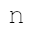

In [25]:
img_path = 'test_letters/7.png'
Image(img_path, width=150, height=150)

In [26]:
test_image = transformation(img_path)

In [27]:
prediciton = p.predict(test_image)
print(classes[np.argmax(prediciton)])

N
